#工具
## 库
numpy plt 
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import StandardScaler
loadtxt(,delimiter,dtype)
.join(data)
lines
np.random.seed(0)
np.random.permutation(lines)
np.concatenate
np.linalg.inv
.T
@

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import StandardScaler

data=np.loadtxt("USA_Housing.csv",delimiter=',',dtype='str')
head=data[0]
print(head)
print(len(head))
lines=data[1:]
lines.astype(float)
print(len(lines))

#split train and test
ratio=0.8
num_train=int(len(lines)*ratio)
np.random.permutation(lines)
train,test=lines[:num_train],lines[num_train:]

#归一化
scaler=StandardScaler()
scaler.fit(train)
train=scaler.transform(train)
test=scaler.transform(test)

x_train,y_train=train[:,:-1],train[:,-1].flatten()
x_test,y_test=test[:,:-1],test[:,-1].flatten()


['Avg. Area Income' 'Avg. Area House Age' 'Avg. Area Number of Rooms'
 'Avg. Area Number of Bedrooms' 'Area Population' 'Price']
6
5000


theta= [ 6.53412047e-01  4.61740008e-01  3.43459165e-01  3.51128711e-03
  4.22433608e-01 -2.07665916e-14]
(6,)


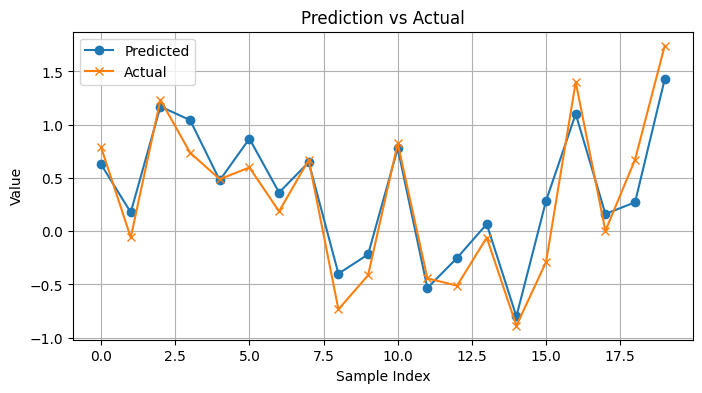

In [17]:
X=np.concatenate([x_train,np.ones((len(x_train),1))],axis=-1)
# calculate theta
theta=np.linalg.inv(X.T@X)@X.T@y_train
print('theta=',theta)
print(theta.shape)
# y_pre=X@np.linalg.inv(X.T@X)@X.T@y_train
# print('pre:',y_pre[:4])
# print('actual:',y_train[:4])
#在测试集上进行计算预测
X_test=np.concatenate([x_test,np.ones((len(x_test),1))],axis=-1)
Y_pre=X_test@theta
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(Y_pre[:20], label='Predicted', marker='o')
plt.plot(y_test[:20], label='Actual', marker='x')
plt.title("Prediction vs Actual")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

In [19]:
#计算预测值和真实值之间的误差
# rmse_loss=np.sqrt(np.square(y_test-Y_pre)/len(y_test))
rmse_loss=np.sqrt(np.square(y_test-Y_pre).mean())
print('RMSE:',rmse_loss)

RMSE: 0.288002007743563


# sklearn实现线性回归
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
.predict(x_test)


In [21]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train,y_train)
print('回归系数：',linreg.coef_,linreg.intercept_)
Y_pre=linreg.predict(x_test)

rmse_loss=np.sqrt((np.square(y_test-Y_pre).mean()))
print('RMSE:',rmse_loss)

回归系数： [0.65341205 0.46174001 0.34345917 0.00351129 0.42243361] -2.0820029754301876e-14
RMSE: 0.288002007743563


In [ ]:
#尝试手写batch_generator
def batch_generator(x,y,batch_size,shuffle=True):
    batch_count=0
    if shuffle:
        index=np.random.permutation(len(x))
        x=x[index]
        y=y[index]
    # end=len(x)-1
    while True:
        start=batch_count*batch_size
        end = min(start + batch_size, len(x))
        # if start>end:
        if start>=end:
            break
        batch_count+=1
        # yield x[start,start+batch_size],y[start,start+batch_size]
        yield x[start:end],y[start:end]
        


theta: [ 0.62646782  0.4537639   0.36443711 -0.01220426  0.41558049 -0.01973869]
theta: [ 0.64445435  0.46268494  0.35166396 -0.00521067  0.41736738 -0.00181641]
theta: [ 0.64965366  0.46478356  0.34847475 -0.00065138  0.41916435  0.00131187]
theta: [ 6.53202029e-01  4.62359488e-01  3.43675968e-01  3.20733563e-03
  4.21797521e-01 -2.98813748e-04]
theta: [ 0.77324406  0.45179305  0.13721007  0.33120824  0.61428328 -0.11881418]


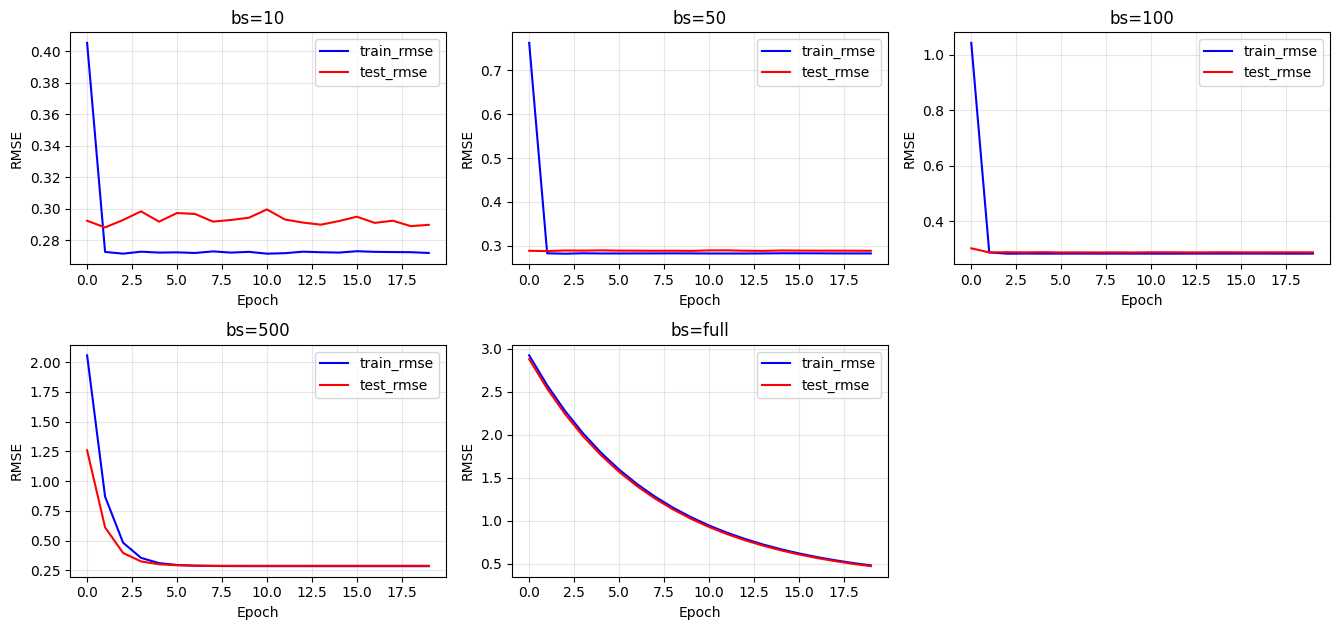

In [53]:
def MSGD(num_epoch,lr,bs):
    X=np.concatenate([x_train,np.ones((len(x_train),1))],axis=-1)
    X_test=np.concatenate([x_test,np.ones((len(x_test),1))],axis=-1)
    theta=np.random.normal(size=X.shape[1])
    #为了观察，添加误差收集
    train_loss=[]
    test_loss=[]
    for _ in range(num_epoch):
        batch=batch_generator(X,y_train,bs,shuffle=True)
        tra_loss=0
        for xb,yb in batch:            
            theta=theta-(lr*xb.T@(xb@theta-yb))/len(xb)#key
            tra_loss+=np.square(yb-xb@theta).sum()
        train_loss.append(np.sqrt(tra_loss/len(X)))
        te_loss=np.sqrt(np.square(y_test-X_test@theta).mean())
        test_loss.append(te_loss)
    print('theta:',theta)
    return theta,train_loss,test_loss


num_epoch = 20
lr = 0.1

# 你想固定包含 bs=20，这里再加入几个常见值作对比
batch_sizes = [10,50,100, 500, len(x_train)]  # 最后一个表示 full-batch

results = {}
for bs in batch_sizes:
    np.random.seed(0)  # 保证每个 batch_size 同样的初始化
    _, train_loss, test_loss = MSGD(num_epoch, lr, bs)
    results[bs] = (train_loss, test_loss)
import math
# 画子图
n = len(batch_sizes)
cols = 3
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(4.5 * cols, 3.2 * rows), squeeze=False)

epochs = np.arange(num_epoch)
for i, bs in enumerate(batch_sizes):
    r, c = divmod(i, cols)
    ax = axes[r][c]
    tr, te = results[bs]
    label_bs = f"bs={bs}" if bs != len(x_train) else "bs=full"
    ax.plot(epochs, tr, color='blue', label='train_rmse')
    ax.plot(epochs, te, color='red',  label='test_rmse')
    ax.set_title(label_bs)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('RMSE')
    ax.legend()
    ax.grid(True, alpha=0.3)

# 隐藏多余子图（如果有）
for j in range(i + 1, rows * cols):
    r, c = divmod(j, cols)
    axes[r][c].axis('off')

plt.tight_layout()
plt.show()